# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create empty data lists, base url, query url, index counter, set counter
city_names = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloud_list = []
wind_list = []
country_list = []
date_list = []

index_counter = 0
set_counter = 0

url = "http://api.openweathermap.org/data/2.5/weather?"

print('Beginning Data Retrieval')
print('------------------------')
for city in cities:
    query_url = url + "&q=" + city + "&appid=" + weather_api_key 
    response = requests.get(query_url).json()
    try:
        city_names.append(response['name'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp_list.append(response['main']['temp_max'])
        humidity_list.append(response['main']['humidity'])
        cloud_list.append(response['clouds']['all'])
        wind_list.append(response['wind']['speed'])
        if index_counter > 49:
            index_counter = 0
            set_counter += 1
        else:
            index_counter +=1
            print(f"Processing Record {index_counter} of Set {set_counter} | {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print('------------------------')
print('Data Retrieval Complete')
print('------------------------')

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 0 | novopokrovka
Processing Record 2 of Set 0 | torbay
Processing Record 3 of Set 0 | saint-pierre
Processing Record 4 of Set 0 | lata
Processing Record 5 of Set 0 | busselton
Processing Record 6 of Set 0 | rikitea
Processing Record 7 of Set 0 | hithadhoo
Processing Record 8 of Set 0 | kaitangata
Processing Record 9 of Set 0 | sayat
Processing Record 10 of Set 0 | aksu
Processing Record 11 of Set 0 | aklavik
Processing Record 12 of Set 0 | charyshskoye
City not found. Skipping...
Processing Record 13 of Set 0 | buckeye
City not found. Skipping...
Processing Record 14 of Set 0 | elektrogorsk
City not found. Skipping...
Processing Record 15 of Set 0 | chipinge
Processing Record 16 of Set 0 | mataura
Processing Record 17 of Set 0 | lebu
Processing Record 18 of Set 0 | bluff
Processing Record 19 of Set 0 | port elizabeth
Processing Record 20 of Set 0 | atuona
Processing Record 21 of Set 0 | poum
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_frame = pd.DataFrame({'City': city_names,
                          'Lat': lat_list,
                          'Lng': lng_list,
                          'Max Temp': max_temp_list,
                          'Humidity': humidity_list,
                          'Cloudiness':cloud_list,
                          'Wind Speed': wind_list,
                          'Country': country_list,
                          'Date': date_list})
city_frame.to_csv("../output_data/cities.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

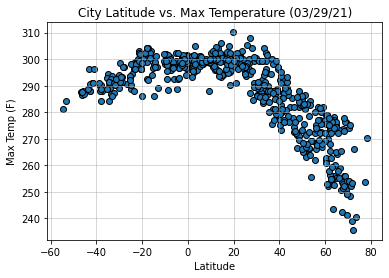

In [5]:
plt.scatter(city_frame['Lat'], city_frame['Max Temp'], edgecolor='black')
plt.title('City Latitude vs. Max Temperature (03/29/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig('General LatitudexTemp.png')

## Latitude vs. Humidity Plot

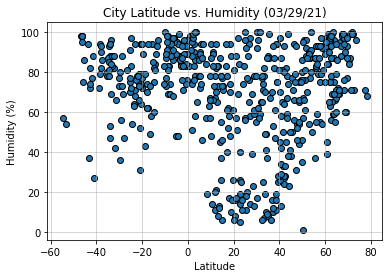

In [6]:
plt.scatter(city_frame['Lat'], city_frame['Humidity'], edgecolor='black')
plt.title('City Latitude vs. Humidity (03/29/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig('General LatitudexHumidity.png')

## Latitude vs. Cloudiness Plot

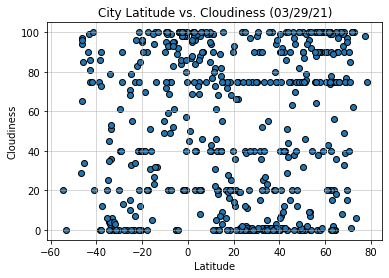

In [7]:
plt.scatter(city_frame['Lat'], city_frame['Cloudiness'], edgecolor='black')
plt.title('City Latitude vs. Cloudiness (03/29/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig('General LatitudexCloudiness.png')

## Latitude vs. Wind Speed Plot

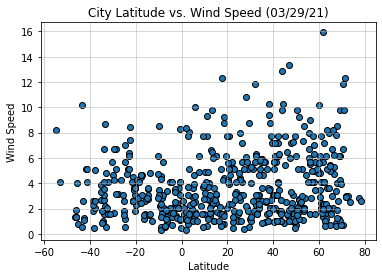

In [8]:
plt.scatter(city_frame['Lat'], city_frame['Wind Speed'], edgecolor='black')
plt.title('City Latitude vs. Wind Speed (03/29/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig('General LatitudexWindSpeed.png')

## Linear Regression

In [9]:
#make northern and souther hemisphere dataframes
north_df = city_frame.loc[city_frame['Lat'] >= 0]
south_df = city_frame.loc[city_frame['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8596941363477761


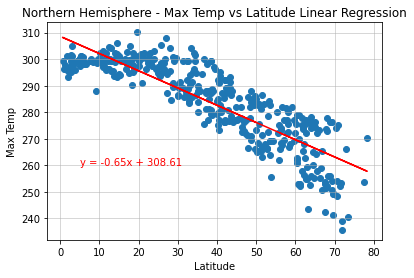

In [10]:
x_values = north_df['Lat']
y_values = north_df['Max Temp']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#plot scatter with linear regression
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs Latitude Linear Regression')
print(f"The r-value is {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.annotate(line_eq, (5,260), color='red');

plt.savefig('Northern Hem LatxTemp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.6824672364479185


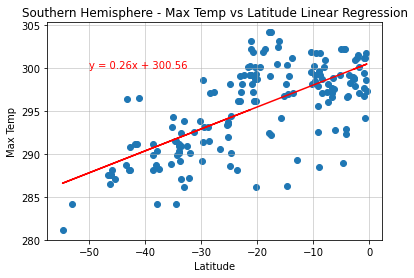

In [11]:
x_values = south_df['Lat']
y_values = south_df['Max Temp']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#plot scatter with linear regression
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs Latitude Linear Regression')
print(f"The r-value is {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.annotate(line_eq, (-50,300), color='red');

plt.savefig('Southern Hem LatxTemp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.2066811588727227


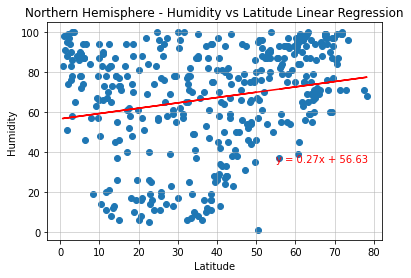

In [12]:
x_values = north_df['Lat']
y_values = north_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#plot scatter with linear regression
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs Latitude Linear Regression')
print(f"The r-value is {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.annotate(line_eq, (55, 35), color='red');

plt.savefig('Northern Hem LatxHumidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.17459160615754793


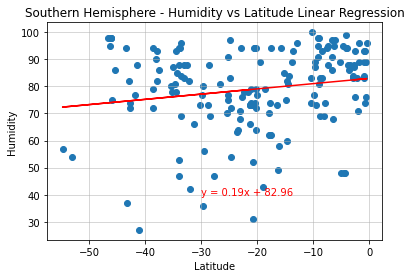

In [13]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#plot scatter with linear regression
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs Latitude Linear Regression')
print(f"The r-value is {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.annotate(line_eq, (-30, 40), color='red');

plt.savefig('Southern Hem LatxHumidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.12608335229610354


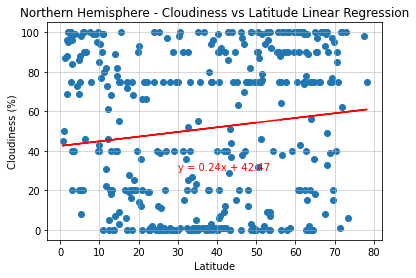

In [14]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#plot scatter with linear regression
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs Latitude Linear Regression')
print(f"The r-value is {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.annotate(line_eq, (30, 30), color='red');

plt.savefig('Northern Hem LatxCloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.2946302962246016


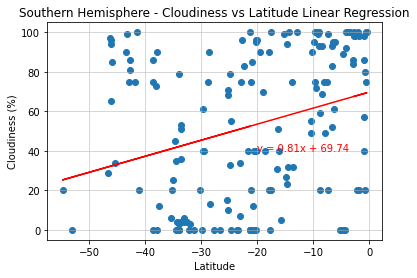

In [15]:
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#plot scatter with linear regression
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs Latitude Linear Regression')
print(f"The r-value is {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.annotate(line_eq, (-20, 40), color='red');

plt.savefig('Southern Hem LatxCloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.10920089160233133


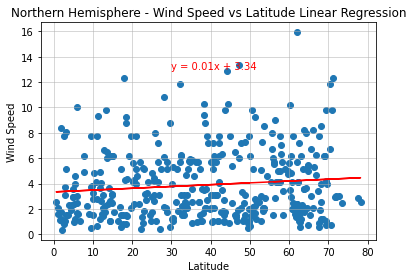

In [16]:
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#plot scatter with linear regression
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs Latitude Linear Regression')
print(f"The r-value is {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.annotate(line_eq, (30, 13), color='red');

plt.savefig('Northern Hem LatxWindSpeed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.13490216161501453


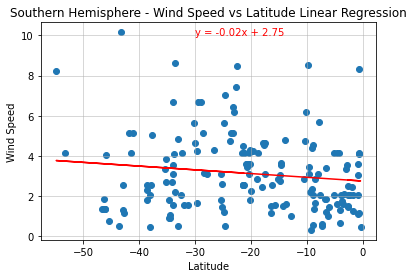

In [17]:
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#plot scatter with linear regression
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs Latitude Linear Regression')
print(f"The r-value is {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.annotate(line_eq, (-30, 10), color='red');

plt.savefig('Southern Hem LatxWindSpeed.png')